#**PRCP-1002-Handwritten Digits Recognition**

###1. Introduction  
This project focuses on building a machine learning model to recognize and classify handwritten digits from the MNIST dataset, which is a widely used dataset for benchmarking image classification algorithms. The MNIST dataset contains 60,000 training images and 10,000 test images of handwritten digits (0-9), each of size 28x28 pixels in grayscale.

The goal of the project is to train a deep learning model that can effectively identify the correct digit label (0-9) from a given 28x28 image.

###2. Problem Statement
Task 1:-Prepare a complete data analysis report on the given data.

Task 2:- Classify a given image of a handwritten digit into one of the 10 classes representing integer values from 0 to 9.

Task3:- Compare between various models and find the classifier that works better.


###3. MNIST Dataset Description:
The MNIST (Modified National Institute of Standards and Technology) dataset is a large collection of handwritten digits commonly used for training image processing systems and evaluating machine learning models. It consists of 70,000 grayscale images of handwritten digits (0-9), each of size 28x28 pixels. The dataset is split into two parts:
*   Training Set: Contains 60,000 images, which are used to train machine learning models.
*   Test Set: Contains 10,000 images, which are used to evaluate the performance of the trained model.

Each image in the dataset is accompanied by a label representing the correct digit (0-9). The dataset is widely used for benchmarking algorithms in image classification and has become a standard for evaluating the performance of various machine learning techniques, particularly in deep learning

###4. Project Objectives


*   Load and process the MNIST dataset.
*   Split the dataset into training and testing sets.
*   Design and implement a deep learning model for digit classification.
*   Train the model using the training data and optimize its performance.
*   Compare multiple machine learning models (KNN, SVM, Logistic Regression, Neural Networks) for digit classification
*   Evaluate the performance of all models using accuracy and other relevant metrics
*   Visualize training and validation accuracy over epochs to assess model performance.
*   Predict labels for new, unseen handwritten digits and compare predictions across models.
*   Save and load the trained models for future use.
*   Explore real-world applications such as postal code reading, document digitization, and automated check processing.










Load and process the MNIST dataset.

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.datasets import mnist
from google.colab.patches import cv2_imshow
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Split the dataset into training and testing sets.

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
## Print the shape and type of training data samples
print("Type of X_train:", type(X_train))
print("Shape of X_train:", X_train.shape)
print("Shape of one sample (X_train[0]):", X_train[0].shape)

Type of X_train: <class 'numpy.ndarray'>
Shape of X_train: (60000, 28, 28)
Shape of one sample (X_train[0]): (28, 28)


Data Visualizations

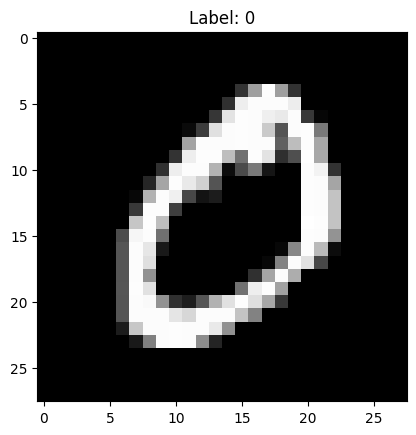

In [ ]:
## Visualize an example image from the training set
plt.imshow(X_train[1], cmap='gray')
plt.title(f"Label: {y_train[1]}")
plt.show()

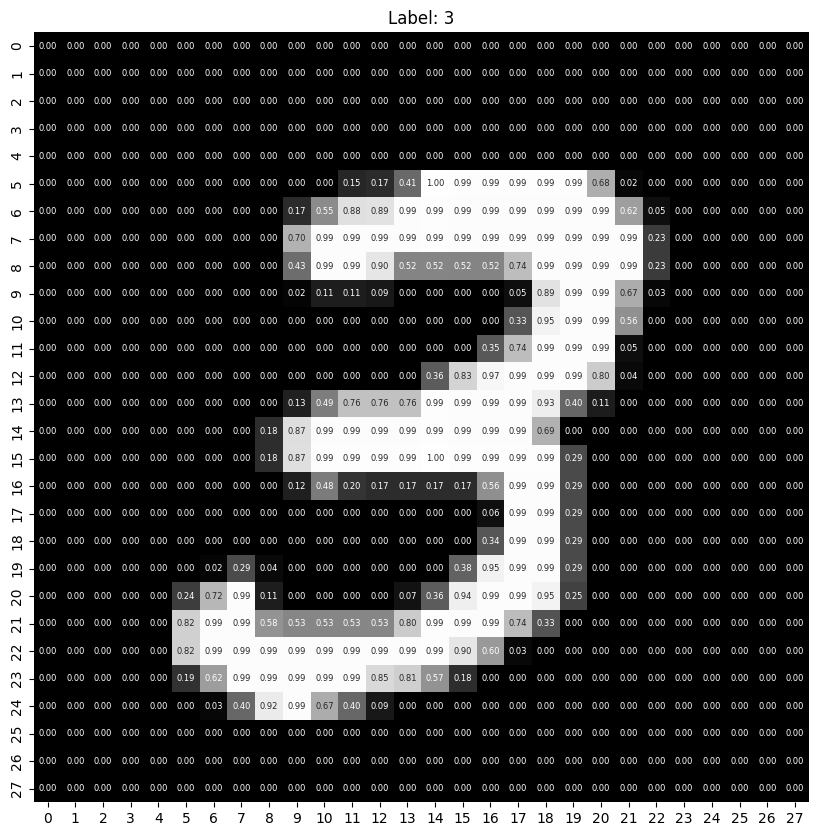

In [ ]:
# Assuming X_train[7] is a 28x28 NumPy array
plt.figure(figsize=(10, 10))  # Adjusted figure size
sns.heatmap(X_train[7], cmap='gray', annot=True, fmt=".2f", annot_kws={"size": 6}, cbar=False)
plt.title(f"Label: {y_train[7]}")
plt.show()

In [ ]:
# Check dataset dimensions
print("Training data size:", len(X_train))
print("Test data size:", len(X_test))

Training data size: 60000
Test data size: 10000


ANN Model Creation

In [ ]:
# Model creation and summary
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28, 28], name="InputLayer"),
    tf.keras.layers.Dense(500, activation="relu", name="HiddenLayer1"),
    tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer2"),
    tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model = tf.keras.models.Sequential(LAYERS)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ InputLayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer1 (Dense)                 │ (None, 500)                 │         392,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer2 (Dense)                 │ (None, 100)                 │          50,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 443,610 (1.69 MB)

 Trainable params: 443,610 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Checking the weights of the first layer
weights, bias = model.layers[1].get_weights()
print("Weights shape:", weights.shape)
print("Bias shape:", bias.shape)

Weights shape: (784, 500)
Bias shape: (500,)


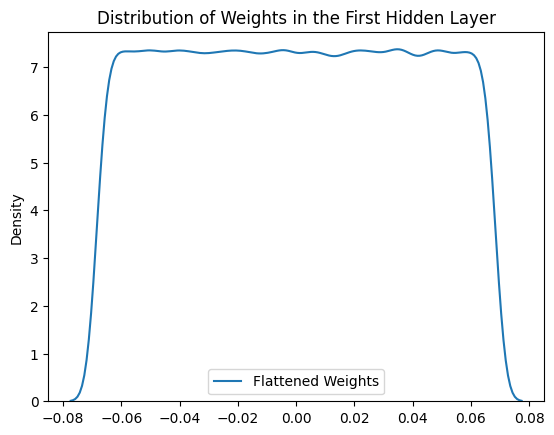

In [ ]:
# Visualizing the distribution of the weights
sns.kdeplot(weights.flatten(), label="Flattened Weights")
plt.title("Distribution of Weights in the First Hidden Layer")
plt.legend()
plt.show()

In [ ]:
# Model compilation
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "adam"
METRICS = ["accuracy"]

In [ ]:
model.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

In [ ]:
# Split training and validation data (from the test set)
x_valid, y_valid = X_test[:10000], y_test[:10000]

In [ ]:
x_valid.shape,y_valid.shape

((10000, 28, 28), (10000,))

Model Training

In [ ]:
# Training the model
EPOCHS = 10
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(x_valid, y_valid))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9020 - loss: 0.3252 - val_accuracy: 0.9710 - val_loss: 0.0947
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9736 - loss: 0.0829 - val_accuracy: 0.9747 - val_loss: 0.0824
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9836 - loss: 0.0521 - val_accuracy: 0.9753 - val_loss: 0.0818
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9878 - loss: 0.0379 - val_accuracy: 0.9805 - val_loss: 0.0657
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9910 - loss: 0.0290 - val_accuracy: 0.9780 - val_loss: 0.0822
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9919 - loss: 0.0243 - val_accuracy: 0.9807 - val_loss: 0.0747
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9944 - loss: 0.0185 - val_accuracy: 0.9796 - val_loss: 0.0697
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9941 - los

Model Evaluation

In [ ]:
# Evaluating the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9766 - loss: 0.1045
Test accuracy: 0.9795, Test loss: 0.0881


Visualizing Predicted Data

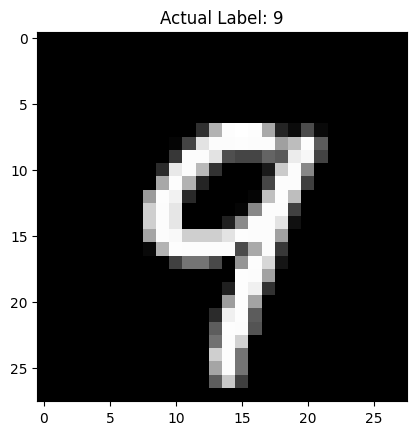

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted Label: 9


In [ ]:
# Visualizing some predictions
plt.imshow(X_test[12], cmap='gray')
plt.title(f"Actual Label: {y_test[12]}")
plt.show()

prediction = model.predict(X_test[12].reshape(1, 28, 28))
predicted_class = np.argmax(prediction)
print(f"Predicted Label: {predicted_class}")

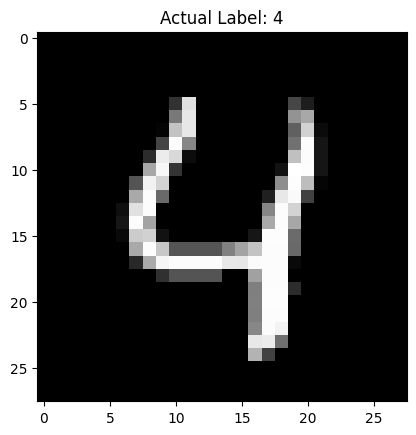

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Label: 4


In [ ]:
# Display another image with prediction
plt.imshow(X_test[4], cmap='gray')
plt.title(f"Actual Label: {y_test[4]}")
plt.show()

predicted_class_2 = np.argmax(model.predict(X_test[4].reshape(1, 28, 28)))
print(f"Predicted Label: {predicted_class_2}")

Plotting Training and Validation Accuracy Over Epochs

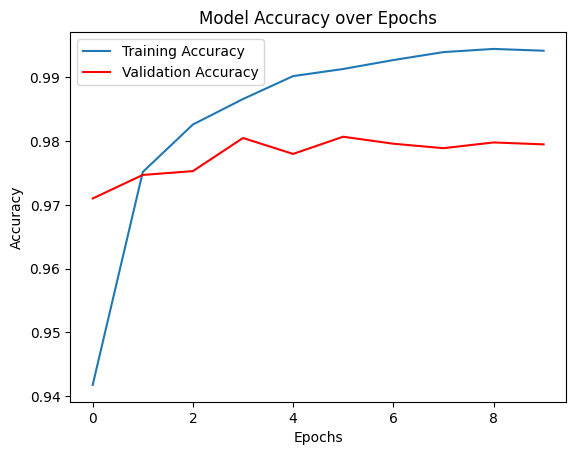

In [ ]:
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy", color='red')
plt.title("Model Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Creating a DataFrame to summarize the training history
history_df = pd.DataFrame(history.history)
print(history_df)

   accuracy      loss  val_accuracy  val_loss
0  0.941733  0.191939        0.9710  0.094659
1  0.975167  0.079320        0.9747  0.082441
2  0.982617  0.055589        0.9753  0.081782
3  0.986617  0.040993        0.9805  0.065657
4  0.990217  0.031334        0.9780  0.082195
5  0.991333  0.026205        0.9807  0.074741
6  0.992733  0.023476        0.9796  0.069744
7  0.993983  0.018711        0.9789  0.080644
8  0.994483  0.016733        0.9798  0.095801
9  0.994200  0.017977        0.9795  0.088099


In [ ]:
# Performance on a few test samples
X_new = X_test[:3]
y_new = y_test[:3]

In [ ]:
# Predicting on new data
y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=-1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


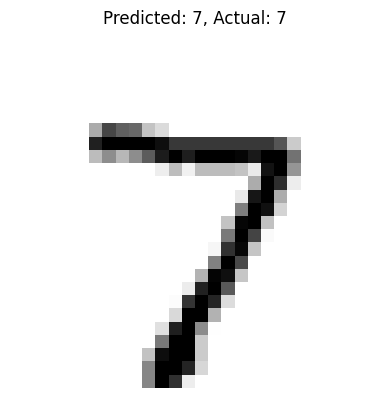

------------------------------------------------------------


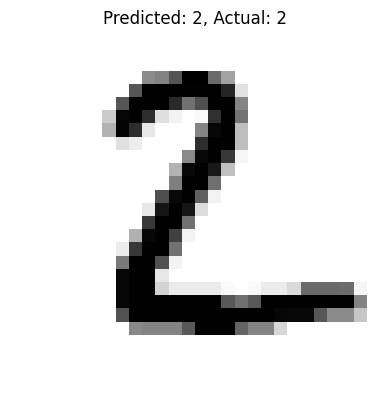

------------------------------------------------------------


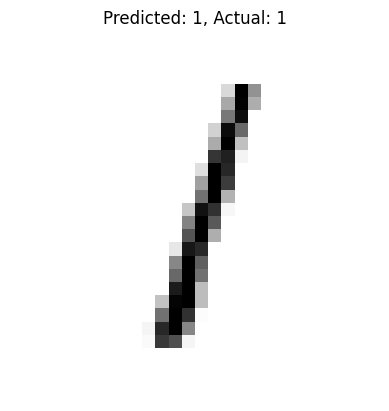

------------------------------------------------------------


In [ ]:
# Visualizing predictions
for data, pred, actual in zip(X_new, y_pred, y_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis("off")
    plt.show()
    print("---" * 20)

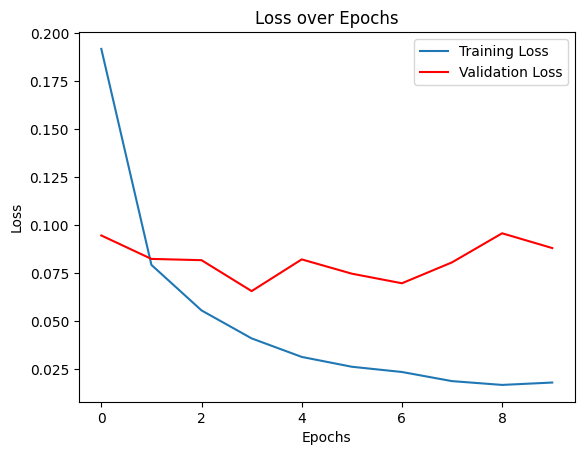

In [ ]:
# Plotting the loss curves
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, color='red', label="Validation Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Saving the trained model
model.save("mnist_model.keras")
print("Model saved as 'mnist_model.keras'")
# Loading the saved model
loaded_model = tf.keras.models.load_model("mnist_model.keras")
print("Model loaded successfully.")

Model saved as 'mnist_model.keras'
Model loaded successfully.


Models expects the input data to be 2D (samples, features), but the X_train data is 3D (samples, height, width)
Flatten the images into 1D vectors before passing them into KNN.

In [ ]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

KNN model Implementation

In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_flatten, y_train)
y_pred_knn = knn.predict(X_test_flatten)

SVM model Implementaion

In [ ]:
# Support Vector Machine
SVM_model= SVC(kernel='rbf', gamma='scale')
SVM_model.fit(X_train_flatten, y_train)
y_pred_svm = SVM_model.predict(X_test_flatten)

Logistic Regression Model Implementation

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_flatten, y_train)
y_pred_log_reg = log_reg.predict(X_test_flatten)

In [ ]:
nn_model = tf.keras.models.load_model("mnist_model.keras")
y_pred_nn = np.argmax(loaded_model.predict(X_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
# Calculate accuracy for each model
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
acc_nn = accuracy_score(y_test, y_pred_nn)

In [ ]:
# Print accuracy for each model
print(f"KNN Accuracy: {acc_knn:.4f}")
print(f"SVM Accuracy: {acc_svm:.4f}")
print(f"Logistic Regression Accuracy: {acc_log_reg:.4f}")
print(f"Neural Network Accuracy: {acc_nn:.4f}")

KNN Accuracy: 0.9705
SVM Accuracy: 0.9792
Logistic Regression Accuracy: 0.9258
Neural Network Accuracy: 0.9795


In [ ]:
# Visualizing the comparison of models using a bar chart
models = ['KNN', 'SVM', 'Logistic Regression', 'Neural Network']
accuracies = [acc_knn, acc_svm, acc_log_reg, acc_nn]

Accuracy Comparision plot

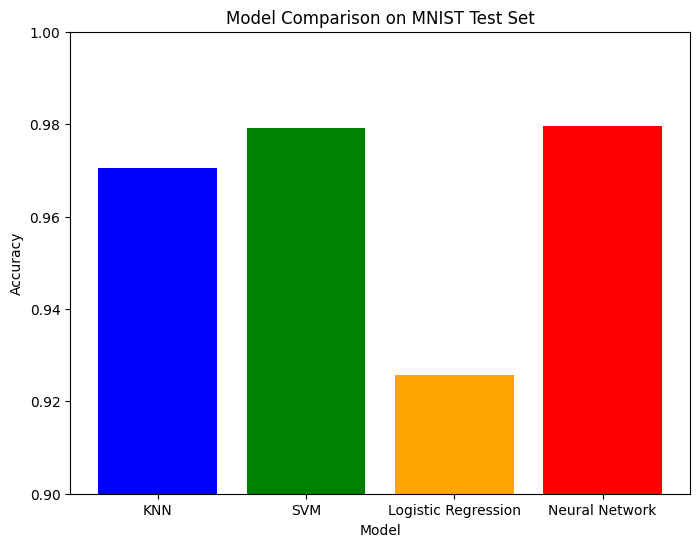

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison on MNIST Test Set')
plt.ylim([0.90, 1.0])  # Adjust y-axis to show values more clearly
plt.show()

##5. Conclusion
The experiment comparing the performance of various machine learning models on the MNIST dataset demonstrates that Neural Networks achieve the highest accuracy at 97.95%, closely followed by Support Vector Machines (SVM) with 97.92%. The K-Nearest Neighbors (KNN) model also performs impressively with 97.05% accuracy, while Logistic Regression lags behind at 92.58%. These results indicate that both Neural Networks and SVM are highly effective in handling the handwritten digit classification task, with Neural Networks narrowly outperforming the rest.

The Neural Network model is the best-performing model in this experiment, achieving an impressive accuracy of 97.95%. Its ability to learn complex patterns and representations in the data makes it highly effective for the MNIST dataset, which consists of intricate handwritten digit images. Neural Networks excel at capturing non-linear relationships and abstract features, giving them a decisive advantage over traditional models like SVM or KNN, especially for image classification tasks. This superior performance makes Neural Networks the optimal choice for achieving the highest accuracy in this context.